# Part I - Exploration - Ford GoBike System Data
## by Nguyen Gia Bao Le

## Introduction
Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.
Data source: 
- [https://www.bikeshare.com/data/](https://www.bikeshare.com/data/)
- [**Github** Bike-Share-Data-Systems](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems)
- [**Udacity** 201902-fordgobike-tripdata.csv](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)


## Preliminary Wrangling
You can download the dataset directly from data source above, or using code below to download the dataset. In this code, I'm using `requests` library to get and save dataset.


## Requirements:
- NumPy
- pandas
- Matplotlib
- Seaborn

*Note*: In this code, I'm using Python 3.6, Seaborn 0.11.2

In [1]:
%%capture
!pip install --upgrade seaborn

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.__version__

'0.11.2'

In [3]:
import requests

data_url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
response = requests.get(data_url).content
open('201902-fordgobike-tripdata.csv', 'w').write(response.decode("utf-8"))

39422395

In [4]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
df[df['start_station_id'].isna()][['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']]

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
475,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93
1733,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96
3625,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96
4070,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92
5654,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93
6214,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93
8499,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95
8783,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94
10967,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95
11071,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96


In [7]:
df[df['start_station_id'].isna()]['end_station_latitude'].value_counts()

37.41    98
37.40    65
37.42    18
37.39    13
37.38     2
37.43     1
Name: end_station_latitude, dtype: int64

In [8]:
df['start_station_latitude'].unique()

array([37.7896254 , 37.791464  , 37.7693053 , 37.77483629, 37.80456235,
       37.7704074 , 37.3172979 , 37.79539294, 37.788975  , 37.78732677,
       37.7810737 , 37.7567083 , 37.8658466 , 37.8693603 , 37.78100972,
       37.75500026, 37.77643482, 37.7801457 , 37.8126783 , 37.772406  ,
       37.7973195 , 37.8302232 , 37.80477   , 37.7737172 , 37.8723555 ,
       37.8717192 , 37.78716801, 37.7633158 , 37.765052  , 37.7552126 ,
       37.764555  , 37.8113514 , 37.760299  , 37.776619  , 37.769757  ,
       37.795392  , 37.76704458, 37.7880593 , 37.79857211, 37.7478584 ,
       37.335885  , 37.775946  , 37.7632417 , 37.849735  , 37.7592103 ,
       37.79728   , 37.8660431 , 37.7765126 , 37.78383   , 37.7839879 ,
       37.794231  , 37.7664827 , 37.7787677 , 37.8688126 , 37.8090126 ,
       37.7610471 , 37.78734902, 37.8160598 , 37.88022245, 37.776598  ,
       37.76918818, 37.78829998, 37.7730627 , 37.7766392 , 37.873558  ,
       37.870139  , 37.77191688, 37.333955  , 37.8098236 , 37.85

In [9]:
# cannot fill nan value of start station and end station, so i decide to drop these records
df = df.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])

In [10]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [11]:
# fill nan value of member_birth_year by mean value of it
df['member_birth_year'] = df['member_birth_year'].fillna((df['member_birth_year'].mean()))

In [12]:
# fill nan value of member_gender by "Other" value
df['member_gender'] = df['member_gender'].fillna("Other")

In [13]:
df.isnull().any().any()

False

In [14]:
def draw_countplot_chart(data, x, y, hue, xlabel, ylabel, title, **kwargs):
    # plot count chart (bar chart) with dataframe, specify columns
    sb.countplot(data=data, x=x, y=y, hue=hue,**kwargs)
    # set axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set chart title
    plt.title(title)

def draw_pie_chart(df, title):
    # plot pie chart with percent annotation
    plt.pie(df, labels=df.index, startangle=90, autopct='%.2f')
    # set chart title
    plt.title(title)
    
def draw_scatter_chart(data, x, y, xlabel, ylabel, title):
    # plot scatter chart with dataframe and specified columns
    sb.scatterplot(data=data, x=x, y=y)
    plt.grid(True)
    # set axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set title
    plt.title(title)

def draw_histogram_chart(data, x, bins, xlabel, title, **kwargs):
    # plot histogram chart with dataframe and specified columns and bins range
    sb.histplot(data, x=x, bins=bins, **kwargs)
    plt.xlabel(xlabel)
    plt.title(title)
    
def draw_bar_chart(data,x,y,xlabel, ylabel, title, **kwargs):
    sb.barplot(x=x,y=y, data=data, ci=None, **kwargs)
    # set axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set chart title
    plt.title(title)

### What is the structure of your dataset?

The dataset have 183412 records, 16 columns. 
Dataset structure:

| column | num records | datatype | description |
| - | - | - | - | 
| duration_sec            | 183412 | int | Trip duration (second) |
| start_time              | 183412 | text | The start time of ride |
| end_time                | 183412 | text | The end time of ride |
| start_station_id        | 183215 | float | The id of the station that start the ride |
| start_station_name      | 183215 | text | The name of the station that start the ride |
| start_station_latitude  | 183412 | float | The latitude of the station that start the ride |
| start_station_longitude | 183412 | float | The longitude of the station that start the ride |
| end_station_id          | 183215 | float | The id of the station that end the ride |
| end_station_name        | 183215 | text | The name of the station that end the ride |
| end_station_latitude    | 183412 | float | The latitude of the station that end the ride |
| end_station_longitude   | 183412 | float | The longtitude of the station that end the ride |
| bike_id                 | 183412 | int | The id of the bike |
| user_type               | 183412 | text | The type of user: 'Customer' and'Subscriber' |
| member_birth_year       | 175147 | float | Year of birth of the user |
| member_gender           | 175147 | text | Gender of the user |
| bike_share_for_all_trip | 183412 | text | The user uses bike share system for all his trip | 

### What are the main features of interest in your dataset?

I'm interested in the time of the trip, the location of the station and the routes of the trip. I'm also interested in the user information. The final question I want to find the answer is "Who is the customer?"

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The time of the trip, and the user information can reflect what the purpose of the trip is

## Univariate Exploration

#### `duration_sec` data

*Question*: 
- How is the distribution of `duration_sec`?
- Is it has outliers data?

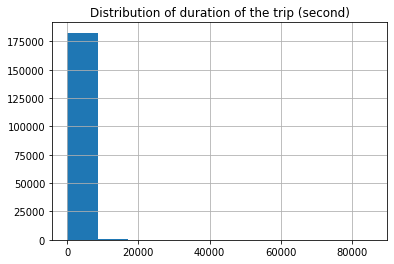

In [15]:
df['duration_sec'].hist();
plt.title("Distribution of duration of the trip (second)")
plt.show()

In [16]:
df['duration_sec'].min(), df['duration_sec'].max()

(61, 85444)

In [17]:
df['duration_sec'].describe()

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [18]:
df['duration_sec'].describe(percentiles=[0.99])

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
50%         514.000000
99%        3456.860000
max       85444.000000
Name: duration_sec, dtype: float64

99% data of `duration_sec` less than 3600, but the max value is 85444, so bigger than almost other data. So I limit the value at 3600 seconds (1 hour)

In [19]:
df[df['duration_sec'] > 3600].shape[0], df[df['duration_sec'] > 3600].shape[0] / df.shape[0] * 100

(1706, 0.9311464672652349)

Duration time data has 1710 outliers, is only distributed 0.93%

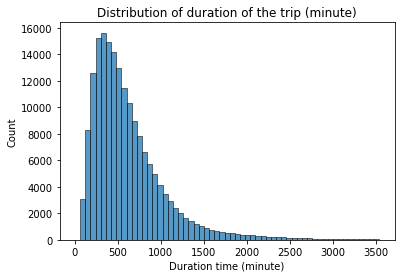

In [20]:
draw_histogram_chart(df, 'duration_sec', np.arange(0, 3600, 60), "Duration time (minute)", "Distribution of duration of the trip (minute)")

*Observations*: 
- 99% duration time less than 1 hour (3600 seconds)
- The duration of the trip is almost distributed from 1 to 20 minutes
- Duration time data has 1710 outliers, is only distributed 0.93%

---

#### `start_time` and `end_time` data

*Question*: 
- What is the weekday that most booked?
- What is the hour that most booked?

In [21]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [22]:
df['start_time_weekday'] = df['start_time'].dt.weekday.astype(int)
df['start_time_hour'] = df['start_time'].dt.hour.astype(int)

df['end_time_weekday'] = df['end_time'].dt.weekday.astype(int)
df['end_time_hour'] = df['end_time'].dt.hour.astype(int)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_weekday,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.000000,Male,No,3,17,4,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.803135,Other,No,3,18,4,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.000000,Male,No,3,12,4,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.000000,Other,No,3,17,4,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.000000,Male,Yes,3,23,4,0


What is the percentage of start weekday and end weekday is the same day?

In [23]:
df[df['start_time_weekday'] == df['end_time_weekday']].shape[0] / df.shape[0] * 100

99.8253418115329

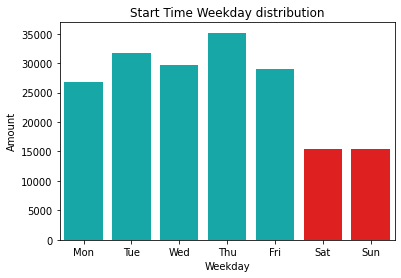

In [24]:
draw_countplot_chart(data=df, x='start_time_weekday', y=None, hue=None, xlabel='Weekday', ylabel="Amount", title='Start Time Weekday distribution', palette=['c', 'c', 'c', 'c', 'c', 'r', 'r'])
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

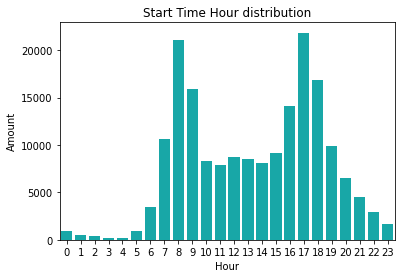

In [25]:
draw_countplot_chart(df, 'start_time_hour', None, None, 'Hour', "Amount", 'Start Time Hour distribution', color='c')

*Observations*: 
- Because of the short trip length (<20 minutes), so the percentage of the trip that the start date and the end date is the same day is great (>90%). Therefore, the distribution of time in end time is reflected by the distribution of the start time
- The most booked weekday is the Thursday
- The weekend days (Saturday and Sunday) have the least booked 
- The most book hour are 8 am and 17 pm, these are the working start time and the working end time --> Users could be the office staff

---

#### `user_type` data

*Question*: 
- The distribution of the type of users?

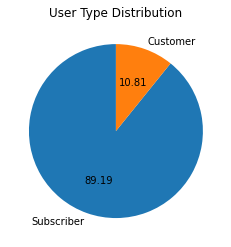

In [26]:
draw_pie_chart(df['user_type'].value_counts(), "User Type Distribution")

*Observations*: 
- 89.19% of user is Subcriber --> Majority of user charges for Bike Share Service permanently

---

#### `member_birth_year` data

*Question*: 
- The distribution of the age of users?

In [27]:
df['member_age'] = 2019 - df['member_birth_year']
df['member_age'].min(), df['member_age'].max()

(18.0, 141.0)

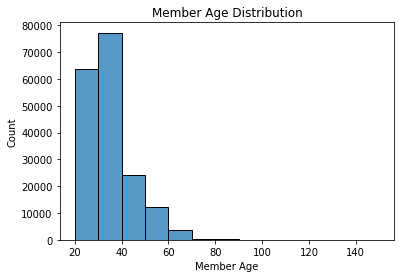

In [28]:
draw_histogram_chart(df, 'member_age', np.arange(20, 151, 10), 'Member Age', 'Member Age Distribution')

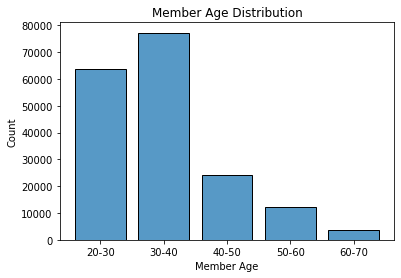

In [29]:
draw_histogram_chart(df, 'member_age', np.arange(20, 80, 10), 'Member Age', 'Member Age Distribution', shrink=.8)
plt.xticks(np.arange(25, 66, 10), ["{:02d}".format(x) + "-" + "{:02d}".format(x+10) for x in range(20,61,10)])
plt.show()

*Observations*: 
- The range of age are from 21 to 151, and decrease by years
- Majority of user's age in range from 20 to 60, and the greatest amount is from 30 to 40 --> Users should be Working-Age People
- Little people has their age greater than 80 year old --> These users could be abnormal case

---

#### `member_gender` data

*Question*: 
- The distribution of the gender of users?

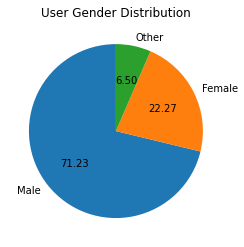

In [30]:
draw_pie_chart(df['member_gender'].value_counts(), "User Gender Distribution")

*Observations*: 
- Majority of user is man, greater than 3 times of woman

## Bivariate Exploration

#### `start_time_weekday` and `start_time_hour` data

*Question*: 
- The distribution of start time hour by weekday?

In [31]:
df['start_time_weekday_type'] = df['start_time_weekday'].apply(lambda x: 'weekend' if x in [5,6] else 'weekday')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_weekday,end_time_hour,member_age,start_time_weekday_type
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.000000,Male,No,3,17,4,8,35.000000,weekday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,1984.803135,Other,No,3,18,4,6,34.196865,weekday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.000000,Male,No,3,12,4,5,47.000000,weekday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.000000,Other,No,3,17,4,4,30.000000,weekday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.000000,Male,Yes,3,23,4,0,45.000000,weekday


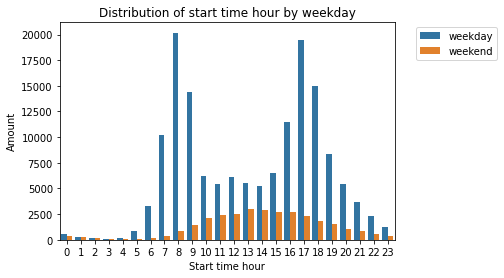

In [32]:
draw_countplot_chart(df, 'start_time_hour', None, hue='start_time_weekday_type', xlabel='Start time hour', ylabel='Amount', title='Distribution of start time hour by weekday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Observations*: 
- In the working day, the most booked hour is 8 and 17, these are the working hour time.
- In the weekend day, 8 and 17 aren't the most booked, but is 13 o'clock 
- --> users should be the office staff, because in working day, they use system before and after the working hour, but in the weekend, they dont use it

#### `start_station` and `end_station` data

*Question*: 
- The distribution of the station location on the map?
- The distribution of the route from start location to end location?

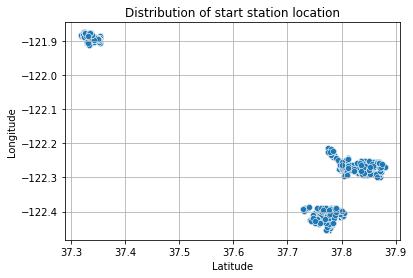

In [33]:
draw_scatter_chart(df, 'start_station_latitude', 'start_station_longitude', 'Latitude', 'Longitude', 'Distribution of start station location')

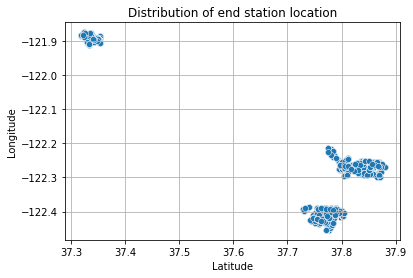

In [34]:
draw_scatter_chart(df, 'end_station_latitude', 'end_station_longitude', 'Latitude', 'Longitude', 'Distribution of end station location')

In [35]:
routes_x = []
routes_y = []
for i in range(len(df)):
    routes_x.append([df.iloc[i, 5], df.iloc[i, 9]]) 
    routes_y.append([df.iloc[i, 6], df.iloc[i, 10]])     

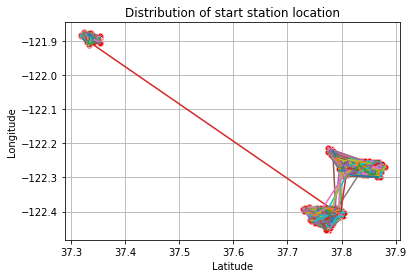

In [36]:
sb.scatterplot(data=df, x='start_station_latitude', y='start_station_longitude', color='g', alpha=1)
sb.scatterplot(data=df, x='end_station_latitude', y='end_station_longitude', color='r', alpha=0.5)

for x, y in zip(routes_x, routes_y):
    plt.plot(x, y)
    
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Distribution of start station location')
plt.show()

*Observations*: 
- Stations could be in 3 cities.
- If 3 cities named "one", "two", "three" from left to right, the popular route of 2 different cites is between city "two" and city "three"

---

#### `member_gender` and `user_type` data

*Question*: 
- The distribution of the member_gender and user_type?

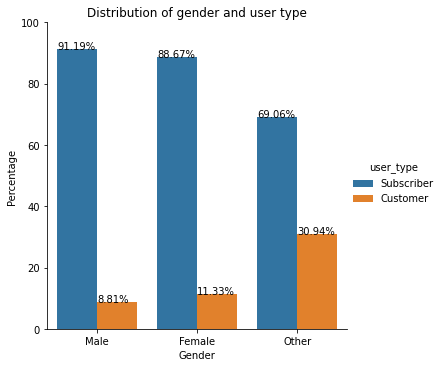

In [37]:
x,y = 'member_gender', 'user_type'
df_temp = df.groupby(x)[y].value_counts(normalize=True)
df_temp = df_temp.mul(100)
df_temp = df_temp.rename('percent').reset_index()
g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df_temp, order = df_temp['member_gender'].value_counts().index)
g.ax.set_ylim(0,100)

# set percent annotation
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# set axis label and chart title
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Distribution of gender and user type")
plt.show()

*Observations*: 
- Male user pay for system more than female user

---

#### `member_gender` and `duration_sec` data

*Question*: 
- How long the duration trip by member gender?

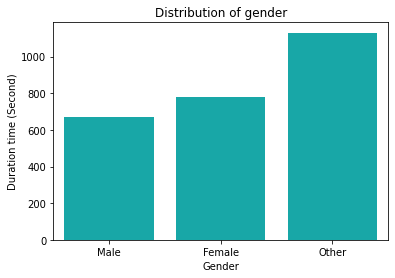

In [38]:
draw_bar_chart(df,'member_gender','duration_sec','Gender', 'Duration time (Second)', 'Distribution of gender', order = df['member_gender'].value_counts().index, color='c')

*Observations*: 
- Female user take more time using the bike share system than male user

---

## Multivariate Exploration

#### `member_gender`, `user_type` and `duration_sec`

*Question*:
- How is the distribution of user_type and member_gender to duraton time?

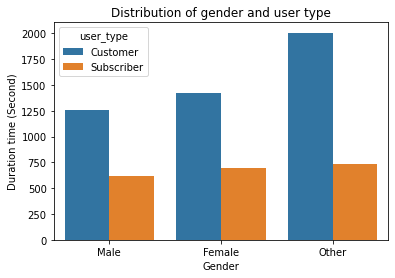

In [39]:
draw_bar_chart(df, 'member_gender', 'duration_sec', 'Gender', 'Duration time (Second)', "Distribution of gender and user type", hue='user_type', order = df['member_gender'].value_counts().index)

*Observations*:
- Female customers ride longer than male user

---

#### `user_type`, `start_time_hour` and `start_time_weekday`

*Question*:
- How is the distribution of hour and weekday by user type?

In [40]:
df_customer = df[df['user_type'] == "Customer"].groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")

df_subcriber = df[df['user_type'] == "Subscriber"].groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subcriber = df_subcriber.pivot("start_time_hour", "start_time_weekday", "bike_id")

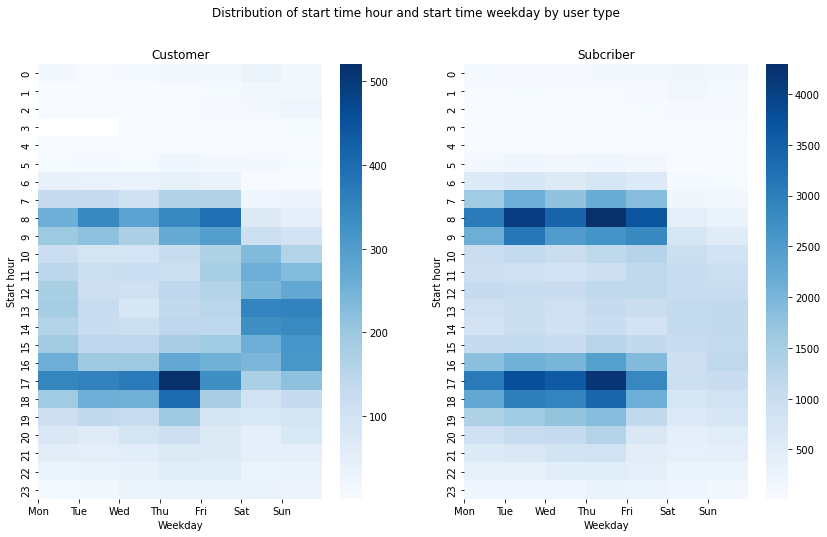

In [41]:
plt.figure(figsize=(14,8))

# draw histogram for "Customer" user
plt.subplot(1, 2, 1)
sb.heatmap(df_customer, cmap='Blues')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday')
plt.ylabel('Start hour')
plt.title('Customer')

# draw histogram for "Subcriber" user
plt.subplot(1, 2, 2)
sb.heatmap(df_subcriber, cmap='Blues')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday')
plt.ylabel('Start hour')
plt.title('Subcriber')

plt.suptitle("Distribution of start time hour and start time weekday by user type")
plt.show()

*Observations*:
- With "Customer" user, they use the system in all day of the week. In weekday, they use in the working hour, and in the weekend, they use in the afternoon. --> "Customer" using system in weekday like the officer staff, other using in weekend like the travelers
- With "Subcriber" user, who pay for the system, they use almost in the weekday and the working time (8AM and 5PM), so they should be the officer staff

## Conclusions
- 89.19% of user is Subcriber
- Many users in the working age (18-40)
- Subcriber user could be the officer staff, because they use the system in before and after the working time
- Almost user using the bike share system ride in the same city, and the almost trips are less than 20 minutes
- Male user pay for system more than female user, but female customers ride longer than male user